In [9]:
!pip install tensorflow

In [1]:
import pandas as pd
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dgopa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dgopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_1 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
data_2 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
data =  pd.concat([data_1, data_2])
data.shape[0]
print(data['headline'][4:10])

4    j.k. rowling wishes snape happy birthday in th...
5                          advancing the world's women
6       the fascinating case for eating lab-grown meat
7    this ceo will send your kids to school, if you...
8    top snake handler leaves sinking huckabee camp...
9    friday's morning email: inside trump's presser...
Name: headline, dtype: object


In [3]:
def clean_text(sentence):
    sentence = sentence.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    sentence = pattern.sub('', sentence)
    sentence = " ".join(filter(lambda x:x[0]!='@', sentence.split()))
    emo = re.compile("["
                           u"\U0001F600-\U0001FFFF"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    sentence = emo.sub(r'', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"that's", "that is", sentence)        
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"where's", "where is", sentence) 
    sentence = re.sub(r"\'ll", " will", sentence)  
    sentence = re.sub(r"\'ve", " have", sentence)  
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"won't", "will not",sentence)
    sentence = re.sub(r"don't", "do not", sentence)
    sentence = re.sub(r"did't", "did not", sentence)
    sentence = re.sub(r"can't", "can not", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"couldn't", "could not", sentence)
    sentence = re.sub(r"have't", "have not", sentence)
    sentence = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", sentence)
    return sentence

In [4]:
def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        tokens = word_tokenize(line)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

sentences = CleanTokenize(data)
sentences[0:10]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages']]

In [5]:
split=0.25
training_size = int(split*len(sentences))
sarc=data['is_sarcastic'].values
train_sentences=sentences[0:training_size]
test_sentences=sentences[training_size:]
train_labels=sarc[0:training_size]
test_labels=sarc[training_size:]
print(training_size)

13832


In [27]:
oov_tok = "<OOV>"
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
vocab_size=len(word_index)
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=14,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=14,padding='post',truncating='post')
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

print(train_padded[4:10])


[[4985 4986 1001 6488  479  433  865   34    0    0    0    0    0    0]
 [6489  195   21    0    0    0    0    0    0    0    0    0    0    0]
 [4987  277  494 9620 1511    0    0    0    0    0    0    0    0    0]
 [ 338  929   74   57   70  313    0    0    0    0    0    0    0    0]
 [ 196 2938 6490  301 6491 1400   66    0    0    0    0    0    0    0]
 [2276  229  220  302   16 9621 4013    0    0    0    0    0    0    0]]


In [23]:

embeddings_index = {}
embedding_dim = 100
#GLOVE_DIR = "D:\Pre-trained Word Vectors\glove.twitter.27B"
f = open(('glove.twitter.27B.100d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [24]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

17831


In [28]:
lstm_dim = 4
dense_dim = 6
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=14, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 14, 100)           1984800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 8)                3360      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,988,221
Trainable params: 3,421
Non-trainable params: 1,984,800
_________________________________________________________________


In [29]:
NUM_EPOCHS = 20
history_lstm = model_lstm.fit(train_padded, train_labels, epochs=NUM_EPOCHS,
                              validation_data=(test_padded, test_labels))

Epoch 1/20
433/433 [==============================] - 22s 31ms/step - loss: 0.6470 - accuracy: 0.6753 - val_loss: 0.5903 - val_accuracy: 0.7355
Epoch 2/20
433/433 [==============================] - 11s 25ms/step - loss: 0.5564 - accuracy: 0.7571 - val_loss: 0.5363 - val_accuracy: 0.7580
Epoch 3/20
433/433 [==============================] - 10s 24ms/step - loss: 0.5089 - accuracy: 0.7827 - val_loss: 0.5078 - val_accuracy: 0.7682
Epoch 4/20
433/433 [==============================] - 11s 24ms/step - loss: 0.4764 - accuracy: 0.7970 - val_loss: 0.4936 - val_accuracy: 0.7730
Epoch 5/20
433/433 [==============================] - 11s 25ms/step - loss: 0.4521 - accuracy: 0.8093 - val_loss: 0.4739 - val_accuracy: 0.7836
Epoch 6/20
433/433 [==============================] - 11s 26ms/step - loss: 0.4318 - accuracy: 0.8168 - val_loss: 0.4627 - val_accuracy: 0.7897
Epoch 7/20
433/433 [==============================] - 11s 25ms/step - loss: 0.4169 - accuracy: 0.8268 - val_loss: 0.4523 - val_accuracy:

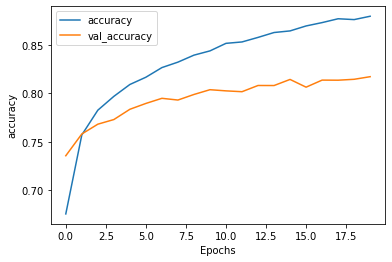

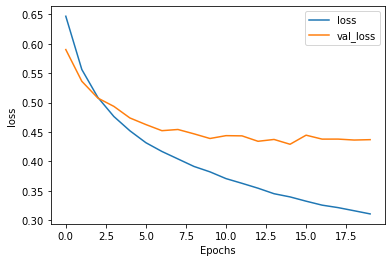

In [30]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [33]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=14, padding='post')
    pred = model_lstm.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [35]:
predict_sarcasm("His name is Bob. He is a nice person.")

1/1 [==============================] - 0s 50ms/step


"It's not a sarcasm."

In [36]:
predict_sarcasm("Sarcasm is very easy to detect.")

1/1 [==============================] - 0s 34ms/step


"It's a sarcasm!"

In [40]:
predict_sarcasm("Silence is golden. Duct tape is silver.")

1/1 [==============================] - 0s 33ms/step


"It's a sarcasm!"